In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_bokeh
import seaborn as sns
pandas_bokeh.output_notebook()



Loading BokehJS ...

In [15]:
pd.options.plotting.backend = "pandas_bokeh"




In [3]:
df = pd.read_excel('Question_3.xlsx',sheet_name="Q3",usecols="A:M")

In [16]:
df.head()

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete
0,2019-11-01,display,desktop,cpc,20,73.56,58641,49,15468,6389,4,0,0
1,2019-11-01,display,desktop,cpc,75,227.40,41074,168,7426,2679,13,0,0
2,2019-11-01,display,desktop,cpc,85,332.99,303787,225,49079,26364,46,0,0
3,2019-11-01,display,desktop,cpc,86,55.41,85832,45,6806,2568,1,0,0
4,2019-11-01,display,desktop,cpc,87,304.83,239124,223,30268,13555,59,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            10178 non-null  object 
 1   format           10178 non-null  object 
 2   device_type      10178 non-null  object 
 3   bid_type         10178 non-null  object 
 4   network_id       10178 non-null  int64  
 5   spend            10178 non-null  float64
 6   impressions      10178 non-null  int64  
 7   clicks           10178 non-null  int64  
 8   measurable_imps  10178 non-null  int64  
 9   viewable_imps    10178 non-null  int64  
 10  engagements      10178 non-null  int64  
 11  video_start      10178 non-null  int64  
 12  video_complete   10178 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.0+ MB


## Convert _month_ to datetime column ##

In [6]:
df['month']=pd.to_datetime(df.month)

In [7]:
df.dtypes

month              datetime64[ns]
format                     object
device_type                object
bid_type                   object
network_id                  int64
spend                     float64
impressions                 int64
clicks                      int64
measurable_imps             int64
viewable_imps               int64
engagements                 int64
video_start                 int64
video_complete              int64
dtype: object

## Check for outliers and see if dataset is normal ##

In [17]:
df.describe()

,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete
count,"10,178.00","10,178.00","10,178.00","10,178.00","10,178.00","10,178.00","10,178.00","10,178.00","10,178.00"
mean,94.21,"1,462.00","348,743.27",903.14,"116,448.72","72,813.55",76.50,"25,344.63","19,121.53"
std,42.64,"5,663.77","1,245,613.56","4,441.91","660,389.54","420,714.45",355.16,"213,659.01","170,725.24"
min,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,75.00,4.04,"1,907.00",2.00,0.00,0.00,0.00,0.00,0.00
50%,106.00,48.20,"20,267.00",22.00,593.00,303.50,2.00,0.00,0.00
75%,125.00,471.96,"150,679.50",228.75,"17,386.00","8,927.00",20.00,0.00,0.00
max,177.00,"205,746.70","28,279,438.00","136,088.00","15,258,642.00","9,637,541.00","12,219.00","7,839,861.00","5,908,159.00"


### Spend max looks particularly high ###

## Somethig seems fishy here  ##

In [41]:
df.loc[df.spend==df.spend.max()]

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete
10162,2020-10-01,CTV,connected-tv,cpm,105,"205,746.70",5047695,0,0,0,0,5029669,4947416


# Visualising Spend over time based on format #

In [58]:
df.groupby(["month","format"])["spend"].sum().unstack().plot(number_format="1.00 $",legend="top_left")

Figure(id='5067', ...)

## Spend by device type ##

In [62]:
df.groupby(["month","device_type"])["spend"].sum().unstack().plot(number_format="1.00 $",legend="top_left")

Figure(id='6396', ...)

In [70]:
df.head()

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete
0,2019-11-01,display,desktop,cpc,20,73.56,58641,49,15468,6389,4,0,0
1,2019-11-01,display,desktop,cpc,75,227.40,41074,168,7426,2679,13,0,0
2,2019-11-01,display,desktop,cpc,85,332.99,303787,225,49079,26364,46,0,0
3,2019-11-01,display,desktop,cpc,86,55.41,85832,45,6806,2568,1,0,0
4,2019-11-01,display,desktop,cpc,87,304.83,239124,223,30268,13555,59,0,0


## Aggregate Monthly Spedning 

In [74]:
df.groupby(["month","format"])["spend"].sum().unstack()

format,CTV,display,native,video
month,,,,
2019-11-01,"56,182.40","273,085.14","519,593.81","183,882.87"
2019-12-01,"62,856.68","351,618.02","523,165.04","209,808.23"
2020-01-01,"50,160.89","188,693.62","320,419.22","107,505.92"
2020-02-01,"83,015.12","250,523.54","348,180.39","197,068.48"
2020-03-01,"75,013.94","309,932.56","340,529.92","174,419.28"
2020-04-01,"58,260.39","243,478.50","246,920.71","102,644.70"
2020-05-01,"82,450.70","287,237.99","305,858.96","113,200.14"
2020-06-01,"117,066.81","398,866.43","490,723.59","154,517.73"
2020-07-01,"162,355.29","459,961.59","394,665.18","227,101.44"


In [101]:
spend_by_type = df.groupby(["month","device_type"])["spend"].sum().unstack()

## aggregate by format type

In [107]:
spend_by_type.head()

device_type,connected-tv,desktop,mobile-app,mobile-web,set-top,tablet-app,tablet-web,unknown
month,,,,,,,,
2019-11-01,"14,152.26","317,995.24","281,077.94","297,535.86","42,030.14","59,547.23","20,375.63",29.91
2019-12-01,"11,742.13","361,141.23","293,724.35","327,001.96","51,114.56","80,661.87","22,035.73",26.16
2020-01-01,"13,688.69","171,870.97","141,247.78","231,073.67","36,472.20","55,689.07","16,729.60",7.68
2020-02-01,"25,302.06","230,017.48","208,775.73","281,655.97","57,713.06","56,889.52","18,413.83",19.88
2020-03-01,"24,487.08","252,067.24","171,838.09","306,412.99","50,526.86","74,161.96","20,393.67",7.81


In [116]:
spend_by_type.reset_index(inplace=True)

In [121]:
spend_by_type["month_name"] = spend_by_type.month.dt.month_name()

In [132]:
spend_by_type.plot_bokeh(x="month_name")

Figure(id='8998', ...)

In [133]:
df.spend.sum()

14880219.716628749

In [136]:
df.groupby("device_type")["spend"].sum().reset_index().plot_bokeh.pie(x="device_type",
                                                                     y="spend")

__x__values_original


Figure(id='9747', ...)

In [137]:
df.groupby("device_type")["spend"].sum()

device_type
connected-tv     865,628.23
desktop        3,973,577.70
mobile-app     3,350,569.13
mobile-web     4,431,107.96
set-top          849,482.50
tablet-app     1,112,962.91
tablet-web       296,631.96
unknown              259.33
Name: spend, dtype: float64

In [138]:
df.spend.sum()

14880219.716628749

In [147]:
df.groupby("network_id")["spend"].rank(ascending=False)

0       157.00
1        60.00
2       191.00
3        85.00
4        74.00
         ...  
10173    48.00
10174     4.00
10175    11.00
10176     3.00
10177     1.00
Name: spend, Length: 10178, dtype: float64

In [266]:
df.sort_values("CTR",ascending=False)

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,CTR
4952,2020-04-01,native,mobile-app,cpm,28,0.06,9,8,0,0,0,0,0,0.89
7232,2020-09-01,native,mobile-app,cpe,124,1.36,894,604,26,1,1,0,0,0.68
7208,2020-09-01,native,mobile-app,cpc,124,387.14,1304,774,60,3,0,0,0,0.59
7262,2020-09-01,native,mobile-app,cpm,124,200.86,25819,14340,624,82,0,0,0,0.56
8103,2019-11-01,video,mobile-web,cpcv,90,0.04,2,1,0,0,0,2,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,2020-03-01,native,tablet-app,cpe,94,0.88,725,0,156,92,0,0,0,0.00
1595,2020-07-01,display,desktop,cpm,73,3.88,657,0,186,115,0,0,0,0.00
4632,2020-03-01,native,tablet-app,cpc,94,0.20,395,0,45,12,0,0,0,0.00
4627,2020-03-01,native,tablet-app,cpc,75,0.09,20,0,1,1,0,0,0,0.00


In [152]:
df2 = pd.read_excel("Question_4 .xlsx",sheet_name="Q4",usecols="A:O")

In [155]:
df2.head()

,month,format,device_type,bid_type,network_id,advertiser_category,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,conversions
0,Sep-2019,display,desktop,cpc,20,Arts & Entertainment,1.76,1207,2,211,76,0,0,0,0
1,Sep-2019,display,desktop,cpc,20,News,2.71,5115,2,1250,617,0,0,0,0
2,Sep-2019,display,desktop,cpc,20,Technology & Computing,0.69,1171,1,247,105,0,0,0,0
3,Sep-2019,display,desktop,cpc,20,Travel,66.57,17591,17,3853,2235,6,0,0,2
4,Sep-2019,display,desktop,cpc,20,Real Estate,1.34,397,1,96,34,0,0,0,0


In [162]:
df2.groupby("advertiser_category")["clicks"].sum().sort_values(ascending=False).head(10)

advertiser_category
Health & Fitness        858229
Business                849743
Travel                  677544
News                    367432
Shopping                326152
Hobbies & Interests     218149
Food & Drink            152839
Arts & Entertainment    145495
Automotive              134525
Home & Garden           125622
Name: clicks, dtype: int64

In [183]:
df2.groupby("advertiser_category")["spend"].sum().sort_values(ascending=False).head(10).reset_index()

,advertiser_category,spend
0,Business,"1,211,488.87"
1,News,"1,160,515.76"
2,Health & Fitness,"870,699.50"
3,Travel,"515,773.80"
4,Shopping,"425,189.46"
5,Hobbies & Interests,"324,303.01"
6,Food & Drink,"274,906.98"
7,Arts & Entertainment,"258,170.49"
8,Home & Garden,"189,229.05"
9,Education,"137,635.06"


In [169]:
df2["month"] = pd.to_datetime(df2.month)

In [184]:
df.head()

,month,format,device_type,bid_type,network_id,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete
0,2019-11-01,display,desktop,cpc,20,73.56,58641,49,15468,6389,4,0,0
1,2019-11-01,display,desktop,cpc,75,227.40,41074,168,7426,2679,13,0,0
2,2019-11-01,display,desktop,cpc,85,332.99,303787,225,49079,26364,46,0,0
3,2019-11-01,display,desktop,cpc,86,55.41,85832,45,6806,2568,1,0,0
4,2019-11-01,display,desktop,cpc,87,304.83,239124,223,30268,13555,59,0,0


In [185]:
df["CTR"] = df.clicks/df.impressions

In [225]:
df.groupby(["month","device_type","format"])["CTR"].mean().to_csv("analysis_format_device2.csv")

In [226]:
df2.head()

,month,format,device_type,bid_type,network_id,advertiser_category,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,conversions
0,2019-09-01,display,desktop,cpc,20,Arts & Entertainment,1.76,1207,2,211,76,0,0,0,0
1,2019-09-01,display,desktop,cpc,20,News,2.71,5115,2,1250,617,0,0,0,0
2,2019-09-01,display,desktop,cpc,20,Technology & Computing,0.69,1171,1,247,105,0,0,0,0
3,2019-09-01,display,desktop,cpc,20,Travel,66.57,17591,17,3853,2235,6,0,0,2
4,2019-09-01,display,desktop,cpc,20,Real Estate,1.34,397,1,96,34,0,0,0,0


In [227]:
df2["CTR"] = df2.clicks/df2.impressions

In [247]:
df2.groupby(["advertiser_category","format"])["CTR","spend"].mean().sort_values("CTR",ascending=False).head(10)

<ipython-input-247-10987bc7039d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby(["advertiser_category","format"])["CTR","spend"].mean().sort_values("CTR",ascending=False).head(10)


,,CTR,spend
advertiser_category,format,,
Health & Fitness,video,0.02,173.63
Shopping,video,0.01,207.09
Arts & Entertainment,video,0.01,154.62
Education,video,0.01,36.26
Automotive,video,0.01,25.26
Business,video,0.01,142.55
Technology & Computing,video,0.01,26.27
Travel,video,0.01,83.91
Food & Drink,video,0.01,115.01


In [248]:
df2["vcr"]= df2.video_complete/df2.video_start

In [263]:
df2.groupby(["advertiser_category","device_type"])["spend","CTR","vcr"].mean().sort_values("CTR",ascending=False).head(10)

<ipython-input-263-b2f115149678>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby(["advertiser_category","device_type"])["spend","CTR","vcr"].mean().sort_values("CTR",ascending=False).head(10)


,,spend,CTR,vcr
advertiser_category,device_type,,,
Automotive,tablet-app,27.60,0.01,0.57
Health & Fitness,tablet-app,74.58,0.01,0.54
Arts & Entertainment,mobile-app,92.44,0.01,0.59
Travel,mobile-app,173.00,0.01,0.60
Health & Fitness,mobile-app,260.74,0.01,0.57
Education,tablet-app,17.61,0.01,0.57
Automotive,mobile-app,39.11,0.01,0.62
Food & Drink,tablet-app,29.99,0.01,0.59
Real Estate,tablet-app,3.90,0.01,0.47


In [274]:
pd.options.display.float_format = '{:,.4f}'.format

<AxesSubplot:xlabel='format', ylabel='device_type'>

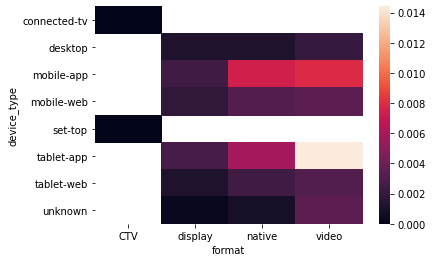

In [276]:
sns.heatmap(pd.crosstab(df.device_type, df.format, values=df.CTR, aggfunc='mean'))

In [317]:
df2.groupby(['advertiser_category',"device_type"])["vcr","CTR"].mean().sort_values("CTR",ascending=False)

<ipython-input-317-3dcf5945057a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby(['advertiser_category',"device_type"])["vcr","CTR"].mean().sort_values("CTR",ascending=False)


vcr    CTR
advertiser_category  device_type               
Automotive           tablet-app   0.5652 0.0093
Health & Fitness     tablet-app   0.5378 0.0091
Arts & Entertainment mobile-app   0.5922 0.0086
Travel               mobile-app   0.5957 0.0079
Health & Fitness     mobile-app   0.5675 0.0075
...                                  ...    ...
News                 set-top      0.9636 0.0000
Personal Finance     connected-tv 0.9328 0.0000
                     set-top      0.9362 0.0000
                     unknown         NaN 0.0000
Home & Garden        connected-tv 0.9386 0.0000

[140 rows x 2 columns]

In [287]:
df2["viewability"]=df2.impressions/df2.viewable_imps

In [288]:
df2["engagement_rate"]=df2.engagements/df2.clicks

In [289]:
df2.head()

,month,format,device_type,bid_type,network_id,advertiser_category,spend,impressions,clicks,measurable_imps,viewable_imps,engagements,video_start,video_complete,conversions,CTR,vcr,viewability,engagement_rate
0,2019-09-01,display,desktop,cpc,20,Arts & Entertainment,1.7646,1207,2,211,76,0,0,0,0,0.0017,NaN,15.8816,0.0000
1,2019-09-01,display,desktop,cpc,20,News,2.7145,5115,2,1250,617,0,0,0,0,0.0004,NaN,8.2901,0.0000
2,2019-09-01,display,desktop,cpc,20,Technology & Computing,0.6896,1171,1,247,105,0,0,0,0,0.0009,NaN,11.1524,0.0000
3,2019-09-01,display,desktop,cpc,20,Travel,66.5689,17591,17,3853,2235,6,0,0,2,0.0010,NaN,7.8707,0.3529
4,2019-09-01,display,desktop,cpc,20,Real Estate,1.3367,397,1,96,34,0,0,0,0,0.0025,NaN,11.6765,0.0000


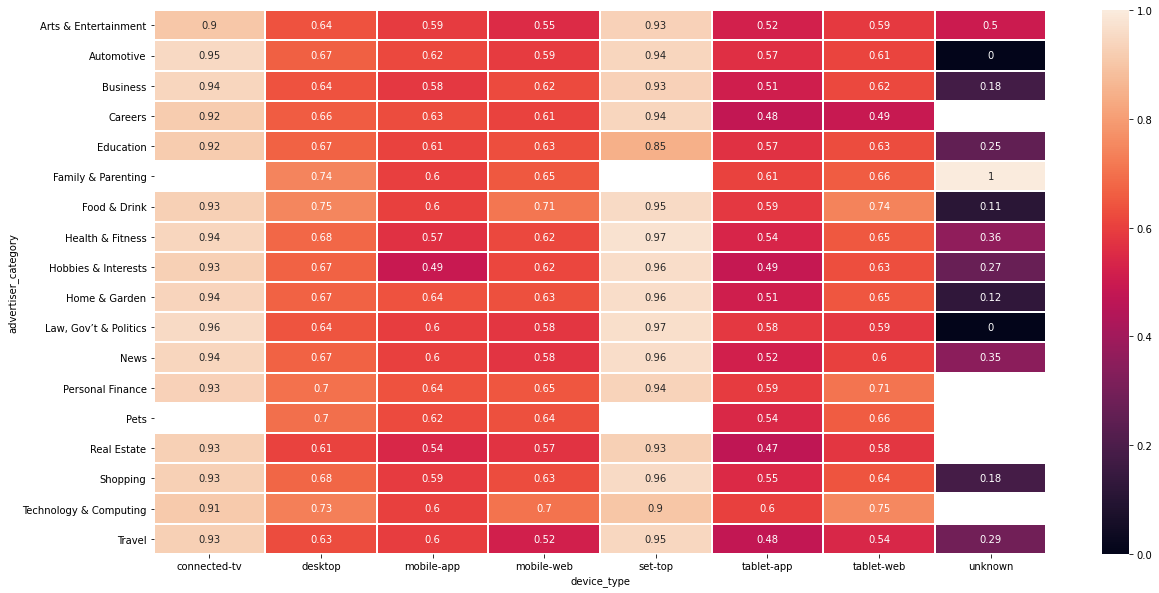

In [321]:
plt.figure(figsize = (20,10))
sns.heatmap(pd.crosstab(df2.advertiser_category,df2.device_type,values=df2.vcr,aggfunc="mean"),linewidths=1,annot=True).figure.savefig("output.svg",format="svg",dpi=1000)